In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mnistdata.loader import MNIST
from sklearn.manifold import TSNE
from aelp import e, d, c, dc, prior, P_DIM

In [2]:
tf.reset_default_graph()

In [3]:
x = tf.placeholder(tf.float32, [None, 28, 28, 1], name='x')
p = tf.placeholder(tf.float32, [None, P_DIM], name='p')
z = e(x)
xr = d(z)
zh = c(p)
xg = d(zh)

In [4]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, 'model/model.ckpt')

INFO:tensorflow:Restoring parameters from model/model.ckpt


In [5]:
mnist = MNIST('../MNIST')
mnist.train_imgs = mnist.train_imgs.reshape([-1, 28, 28, 1])
mnist.test_imgs = mnist.test_imgs.reshape([-1, 28, 28, 1])

In [6]:
examples = 3
x_batch, _ = mnist.next_batch(examples)
xr_batch = sess.run(xr, {x: x_batch})

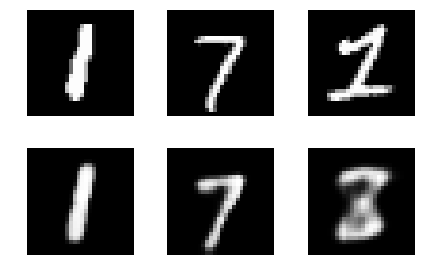

In [7]:
fig, axs = plt.subplots(2, examples)
fi = 0
for i in range(examples):
    axs[0, i].imshow(x_batch[fi].reshape([28, 28]), cmap='gray')
    axs[0, i].axis('off')
    axs[1, i].imshow(xr_batch[fi].reshape([28, 28]), cmap='gray')
    axs[1, i].axis('off')
    fi += 1
fig.tight_layout()
plt.show()

In [8]:
test_xz = sess.run(z, {x: mnist.test_imgs})
test_zh = sess.run(zh, {p: prior(mnist.test_imgs.shape[0])})

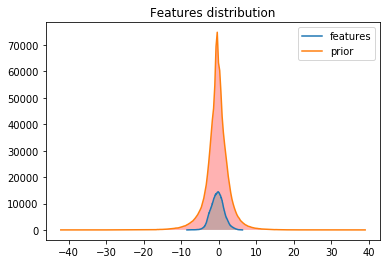

In [9]:
values_xz, bins_xz = np.histogram(test_xz.flatten(), bins=250)
values_z, bins_z = np.histogram(test_zh.flatten(), bins=250)
plt.plot(bins_xz[:-1], values_xz)
plt.plot(bins_z[:-1], values_z)
plt.fill(bins_xz[:-1], values_xz, 'c', bins_z[:-1], values_z, 'r', alpha=0.3)
plt.title('Features distribution')
plt.legend(['features', 'prior'])
plt.show()

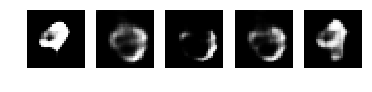

In [12]:
gs = sess.run(xg, {p: prior(5)})
fig, axs = plt.subplots(1, 5)
for i in range(5):
    axs[i].imshow(gs[i].reshape([28, 28]), cmap='gray')
    axs[i].axis('off')
plt.show()